In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [124]:
Housing=pd.read_csv('train.csv')
print(Housing.shape)


(1460, 81)


## Quant Variables

In [125]:
Housing[Housing.dtypes[Housing.dtypes!=np.object].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

**Handling Missing values in Quant data**

In [126]:
Housing['LotFrontage'].fillna(Housing['LotFrontage'].median(),inplace=True)
Housing['MasVnrArea'].fillna(0,inplace=True)

**Cresting teo new columns from YearBuilt , YearRemodAdd and YrSold** 

**Drop YearBuilt , YearBuiltRemodAdd, YrSold and MoSold**

**Dropping columns for which we have more missing values**

In [127]:
Housing['YearBuiltRemod']=Housing['YearRemodAdd']-Housing['YearBuilt']
Housing['YearRemodsold']=Housing['YrSold']-Housing['YearRemodAdd']
Housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','WoodDeckSF','OpenPorchSF','LowQualFinSF'],axis=1,inplace=True)

In [128]:
Columns=['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','KitchenAbvGr','GarageArea']
def drop_outliers(df):
    for col in Columns:
        QMin = np.percentile(df[col].dropna(),0.05)
        QMax = np.percentile(df[col].dropna(),99)
        df =  df[(df[col] >= QMin) & (df[col] <= QMax)] 
    return df  

Housing = drop_outliers(Housing)
Housing.reset_index(drop=True,inplace=True)

Percentiles
[ 0.   1.   4.   6.  10.  16.  30.2 38.4 48.  57.  58.  60.  60. ]
No of Nulls: 0
Int64Index([], dtype='int64')


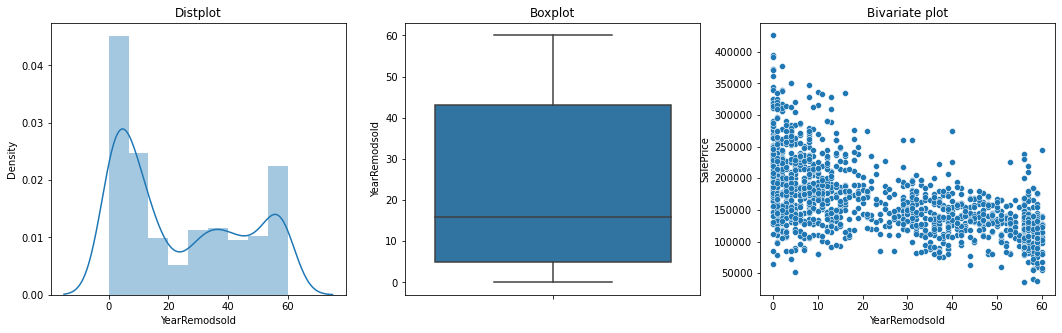

In [129]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['YearRemodsold'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['YearRemodsold'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='YearRemodsold',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['YearRemodsold'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['YearRemodsold'].isna())))
print(Housing[Housing['YearRemodsold']>2155.05].index)

Percentiles
[  0.     0.     0.     0.     0.     0.     1.     9.    30.    51.
  72.9   94.18 121.  ]
No of Nulls: 0
Int64Index([], dtype='int64')


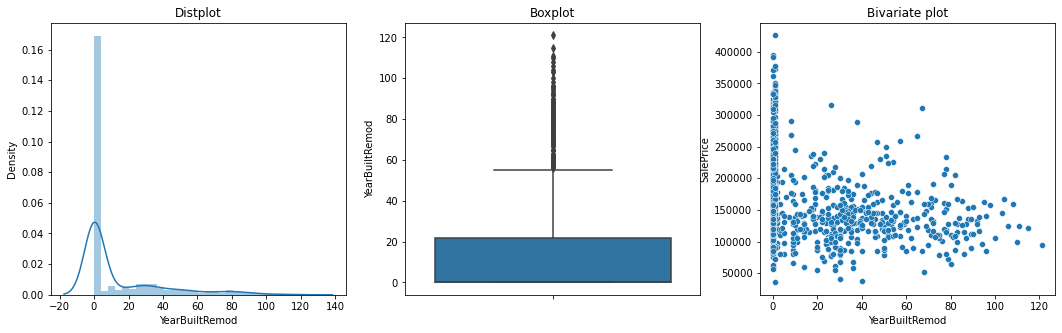

In [130]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['YearBuiltRemod'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['YearBuiltRemod'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='YearBuiltRemod',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['YearBuiltRemod'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['YearBuiltRemod'].isna())))
print(Housing[Housing['YearBuiltRemod']>2155.05].index)

Percentiles
[   0.    630.    735.    816.    876.    952.   1040.   1141.4  1279.8
 1478.   1613.6  1755.34 1856.  ]
No of Nulls: 0
Int64Index([], dtype='int64')


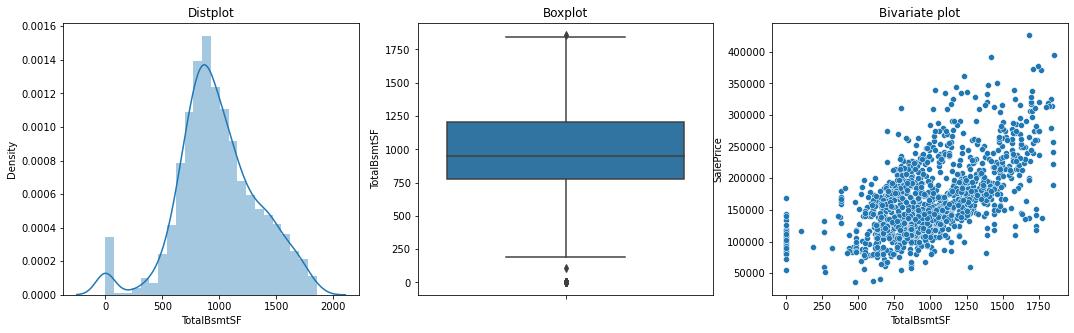

In [131]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['TotalBsmtSF'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['TotalBsmtSF'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='TotalBsmtSF',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['TotalBsmtSF'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['TotalBsmtSF'].isna())))
print(Housing[Housing['TotalBsmtSF']>2155.05].index)

Percentiles
[ 372.    753.2   833.8   898.2   968.   1050.   1131.2  1230.2  1369.2
 1554.8  1669.8  1804.44 1872.  ]
No of Nulls: 0


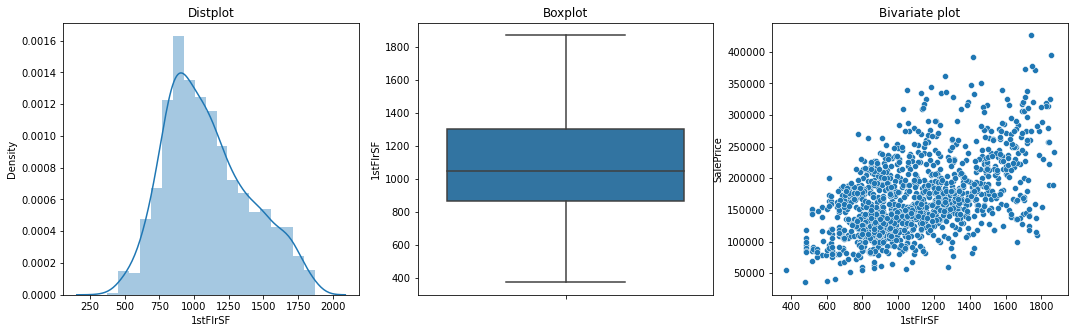

In [132]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['1stFlrSF'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['1stFlrSF'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='1stFlrSF',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['1stFlrSF'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['1stFlrSF'].isna())))

Percentiles
[   0.      0.      0.      0.      0.      0.    433.2   648.    765.
  891.2  1031.9  1232.16 1330.  ]
No of Nulls: 0


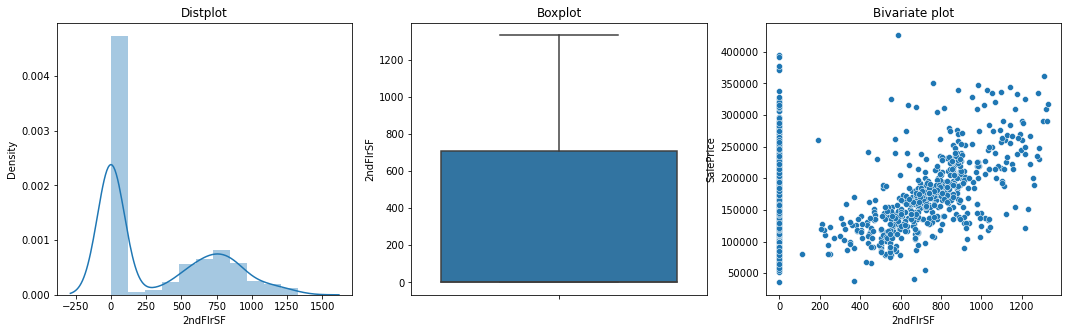

In [133]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['2ndFlrSF'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['2ndFlrSF'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='2ndFlrSF',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['2ndFlrSF'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['2ndFlrSF'].isna())))
#print(sum(Housing['2ndFlrSF']>1572.41))

Percentiles
[ 480.    900.   1040.   1158.   1284.8  1393.   1502.4  1635.   1750.
 1968.8  2200.9  2519.18 2620.  ]
No of Nulls: 0
Int64Index([], dtype='int64')


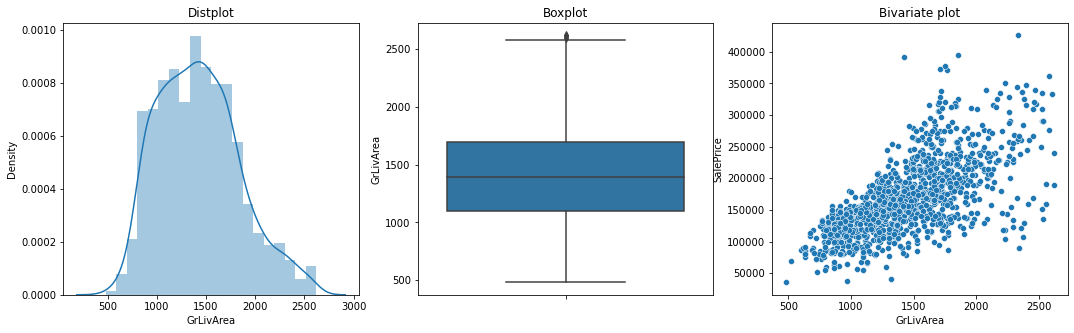

In [134]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.distplot(Housing['GrLivArea'])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.boxplot(y=Housing['GrLivArea'])
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x='GrLivArea',y='SalePrice')
print('Percentiles',sep=' ')
print(np.percentile(list(Housing['GrLivArea'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing['GrLivArea'].isna())))
print(Housing[Housing['GrLivArea']>3123.48].index)

**Above Quantitative variables are directly proportional to Saleprice, Except Derived columns Year build and year remodeled**

**Handling missing values in Categorical data**

In [135]:
Housing['MasVnrType'].fillna('NM',inplace=True)
Housing['BsmtExposure'].fillna('NB',inplace=True)
Housing['BsmtFinType1'].fillna('NB',inplace=True)
Housing['BsmtFinType2'].fillna('NB',inplace=True)
Housing['Electrical'].fillna(list(Housing['Electrical'].mode())[0],inplace=True)
Housing['GarageType'].fillna('NG',inplace=True)
Housing['GarageFinish'].fillna('NG',inplace=True)
Housing['Fence'].fillna('NF',inplace=True)
Housing['MiscFeature'].fillna('NF',inplace=True)
Housing['PoolQC'].fillna('NP',inplace=True)
Housing['Alley'].fillna('NA',inplace=True)
NA_Cat_C=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']
for c in NA_Cat_C:
    Housing[c].fillna(0,inplace=True)

**Combining columns condition1 & Condition2 , BsmtFinType1 & BsmtFinType2 , Exterior1st & Exterior2nd**

In [136]:
Housing['Extr12']=np.zeros(len(Housing))
Housing['Exterior']='X'
for i in range(len(Housing)):
    if Housing['Exterior1st'][i]!=Housing['Exterior2nd'][i]:
        Housing['Exterior'][i]=Housing['Exterior1st'].loc[i]+Housing['Exterior2nd'].loc[i]
        Housing['Extr12'][i]=1
    else:
        Housing['Exterior'][i]=Housing['Exterior1st'].loc[i]
        Housing['Extr12'][i]=0

In [137]:
Housing['Cond12']=np.zeros(len(Housing))
Housing['Condition']='X'
for i in range(len(Housing)):
    if Housing['Condition1'][i]!=Housing['Condition2'][i]:
        Housing['Condition'][i]=Housing['Condition1'].loc[i]+Housing['Condition2'].loc[i]
        Housing['Cond12'][i]=1
    else:
        Housing['Condition'][i]=Housing['Condition1'].loc[i]
        Housing['Cond12'][i]=0


In [138]:
Housing['BsmtFinType1'].fillna(list(Housing['BsmtFinType1'].mode())[0],inplace=True)
Housing['BsmtFinType2'].fillna(list(Housing['BsmtFinType1'].mode())[0],inplace=True)
Housing['BsmtFinType12']=np.zeros(len(Housing))
Housing['BsmtFinType']='X'
for i in range(len(Housing)):
    if Housing['BsmtFinType1'][i]!=Housing['BsmtFinType2'][i]:
        #print(i)
        Housing['BsmtFinType'][i]=Housing['BsmtFinType1'].loc[i]+Housing['BsmtFinType2'].loc[i]
        Housing['BsmtFinType12'][i]=1
    else:
        Housing['BsmtFinType'][i]=Housing['BsmtFinType1'].loc[i]
        Housing['BsmtFinType12'][i]=0
        

**Converting few of Unordered Categorical to Ordered Categorical**

In [139]:
c1=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for x in c1:
    #Housing[x]=np.zeros(len(Housing))
    for i in range(len(Housing)):
        if Housing[x][i]=='Ex':
            Housing[x][i]=5
        elif Housing[x][i]=='Gd':
            Housing[x][i]=4
        elif Housing[x][i]=='TA':
            Housing[x][i]=3
        elif Housing[x][i]=='Fa':
            Housing[x][i]=2
        elif Housing[x][i]=='Po':
            Housing[x][i]=1
        elif Housing[x][i]==0:
            Housing[x][i]=0
        else:
            print(x)

No of Nulls: 0
3    847
4    403
5     22
2     11
Name: ExterQual, dtype: int64


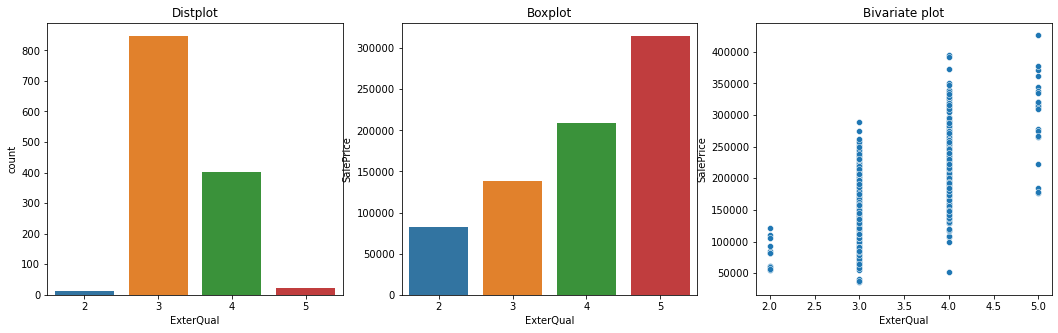

In [140]:
c='ExterQual'
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.countplot(Housing[c])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.barplot(x=c,y='SalePrice',data=Housing[[c,'SalePrice']].groupby(c).median().reset_index())
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x=c,y='SalePrice')
#print('Percentiles',sep=' ')
#print(np.percentile(list(Housing['OverallQual'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing[c].isna())))
print(Housing[c].value_counts())

No of Nulls: 0
5    628
3    387
4    222
2     45
1      1
Name: HeatingQC, dtype: int64


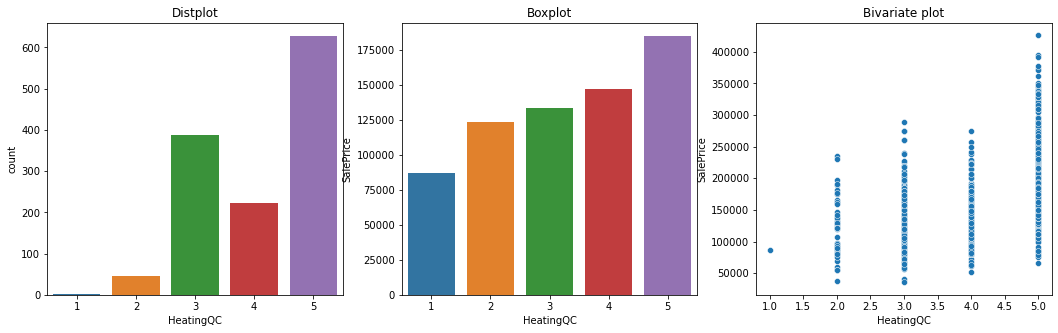

In [141]:
c='HeatingQC'
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.countplot(Housing[c])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.barplot(x=c,y='SalePrice',data=Housing[[c,'SalePrice']].groupby(c).median().reset_index())
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x=c,y='SalePrice')
#print('Percentiles',sep=' ')
#print(np.percentile(list(Housing['OverallQual'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing[c].isna())))
print(Housing[c].value_counts())

No of Nulls: 0
3    691
4    504
5     53
2     35
Name: KitchenQual, dtype: int64


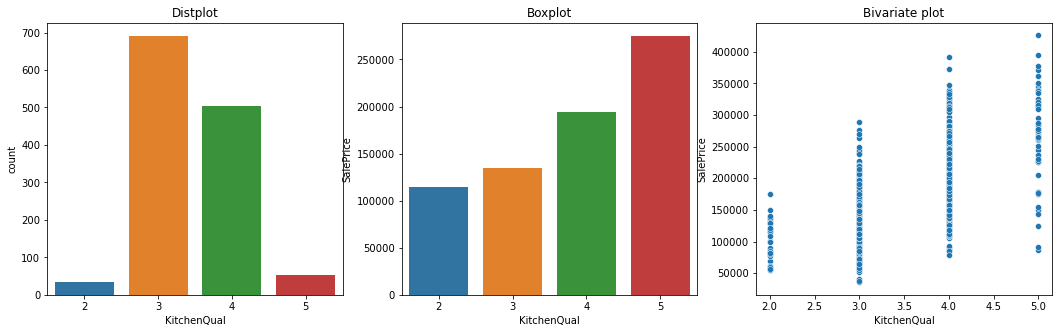

In [142]:
c='KitchenQual'
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Distplot')
sns.countplot(Housing[c])
plt.subplot(1,3,2)
plt.title('Boxplot')
sns.barplot(x=c,y='SalePrice',data=Housing[[c,'SalePrice']].groupby(c).median().reset_index())
plt.subplot(1,3,3)
plt.title('Bivariate plot')
sns.scatterplot(data=Housing,x=c,y='SalePrice')
#print('Percentiles',sep=' ')
#print(np.percentile(list(Housing['OverallQual'].dropna()),[0,10,20,30,40,50,60,70,80,90,95,99,100]))
print('No of Nulls: '+str(sum(Housing[c].isna())))
print(Housing[c].value_counts())

**Drop Unnecessary Categorical variables**

In [143]:
Housing.drop(['Street','Utilities','PoolQC'],axis=1,inplace=True)

In [144]:
Housing_MSZoning=pd.get_dummies(Housing['MSZoning'],prefix='MSZoning')
Housing_Alley=pd.get_dummies(Housing['Alley'],prefix='Alley')
Housing_LotShape=pd.get_dummies(Housing['LotShape'],prefix='LotShape')
Housing_LandContour=pd.get_dummies(Housing['LandContour'],prefix='LandContour')
Housing_Neighborhood=pd.get_dummies(Housing['Neighborhood'],prefix='Neighborhood')
Housing_LandSlope=pd.get_dummies(Housing['LandSlope'],prefix='LandSlope')
Housing_BldgType=pd.get_dummies(Housing['BldgType'],prefix='BldgType')
Housing_HouseStyle=pd.get_dummies(Housing['HouseStyle'],prefix='HouseStyle')
Housing_RoofStyle=pd.get_dummies(Housing['RoofStyle'],prefix='RoofStyle')
Housing_RoofMatl=pd.get_dummies(Housing['RoofMatl'],prefix='RoofMatl')
Housing_MasVnrType=pd.get_dummies(Housing['MasVnrType'],prefix='MasVnrType')
Housing_Foundation=pd.get_dummies(Housing['Foundation'],prefix='Foundation')
Housing_BsmtExposure=pd.get_dummies(Housing['BsmtExposure'],prefix='BsmtExposure')
Housing_Heating=pd.get_dummies(Housing['Heating'],prefix='Heating')
Housing_CentralAir=pd.get_dummies(Housing['CentralAir'],prefix='CentralAir')
Housing_Electrical=pd.get_dummies(Housing['Electrical'],prefix='Electrical')
Housing_Functional=pd.get_dummies(Housing['Functional'],prefix='Functional')
Housing_GarageType=pd.get_dummies(Housing['GarageType'],prefix='GarageType')
Housing_GarageFinish=pd.get_dummies(Housing['GarageFinish'],prefix='GarageFinish')
Housing_PavedDrive=pd.get_dummies(Housing['PavedDrive'],prefix='PavedDrive')
Housing_Fence=pd.get_dummies(Housing['Fence'],prefix='Fence')
Housing_MiscFeature=pd.get_dummies(Housing['MiscFeature'],prefix='MiscFeature')
Housing_SaleType=pd.get_dummies(Housing['SaleType'],prefix='SaleType')
Housing_SaleCondition=pd.get_dummies(Housing['SaleCondition'],prefix='SaleCondition')
Housing_Condition=pd.get_dummies(Housing['Condition'],prefix='Condition')
Housing_BsmtFinType=pd.get_dummies(Housing['BsmtFinType'],prefix='BsmtFinType')
Housing_Exterior=pd.get_dummies(Housing['Exterior'],prefix='Exterior')


In [145]:
Housing_MSZoning.drop('MSZoning_C (all)',axis=1,inplace=True)
Housing_Alley.drop('Alley_NA',axis=1,inplace=True)
Housing_LotShape.drop('LotShape_IR3',axis=1,inplace=True)
Housing_LandContour.drop('LandContour_Low',axis=1,inplace=True)
Housing_Neighborhood.drop('Neighborhood_Blueste',axis=1,inplace=True)
Housing_LandSlope.drop('LandSlope_Sev',axis=1,inplace=True)
Housing_BldgType.drop('BldgType_2fmCon',axis=1,inplace=True)
Housing_HouseStyle.drop('HouseStyle_2.5Fin',axis=1,inplace=True)
Housing_RoofStyle.drop('RoofStyle_Mansard',axis=1,inplace=True)
Housing_RoofMatl.drop('RoofMatl_WdShngl',axis=1,inplace=True)
Housing_MasVnrType.drop('MasVnrType_BrkCmn',axis=1,inplace=True)
Housing_Foundation.drop('Foundation_Wood',axis=1,inplace=True)
Housing_BsmtExposure.drop('BsmtExposure_NB',axis=1,inplace=True)
Housing_Heating.drop('Heating_OthW',axis=1,inplace=True)
Housing_CentralAir.drop('CentralAir_N',axis=1,inplace=True)
Housing_Electrical.drop('Electrical_Mix',axis=1,inplace=True)
Housing_Functional.drop('Functional_Maj2',axis=1,inplace=True)
Housing_GarageType.drop('GarageType_2Types',axis=1,inplace=True)
Housing_GarageFinish.drop('GarageFinish_NG',axis=1,inplace=True)
Housing_PavedDrive.drop('PavedDrive_P',axis=1,inplace=True)
Housing_Fence.drop('Fence_NF',axis=1,inplace=True)
Housing_MiscFeature.drop('MiscFeature_NF',axis=1,inplace=True)
Housing_SaleType.drop('SaleType_Con',axis=1,inplace=True)
Housing_SaleCondition.drop('SaleCondition_AdjLand',axis=1,inplace=True)
Housing_Condition.drop('Condition_Feedr',axis=1,inplace=True)
Housing_BsmtFinType.drop('BsmtFinType_BLQ',axis=1,inplace=True)
Housing_Exterior.drop('Exterior_VinylSdHdBoard',axis=1,inplace=True)


In [146]:
Housing1=pd.concat([Housing,Housing_MSZoning,Housing_Alley,Housing_LotShape,Housing_LandContour,Housing_Neighborhood,Housing_LandSlope,Housing_BldgType,Housing_HouseStyle,Housing_RoofStyle,Housing_RoofMatl,Housing_MasVnrType,Housing_Foundation,Housing_BsmtExposure,Housing_Heating,Housing_CentralAir,Housing_Electrical,Housing_Functional,Housing_GarageType,Housing_GarageFinish,Housing_PavedDrive,Housing_Fence,Housing_MiscFeature,Housing_SaleType,Housing_SaleCondition,Housing_Condition,Housing_BsmtFinType,Housing_Exterior],axis=1)

In [147]:
Housing1.drop(['Condition1','Condition2','Exterior1st','Exterior2nd','BsmtFinType1','BsmtFinType2','MSZoning', 'Alley', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','MasVnrType','Foundation','BsmtExposure','Heating','CentralAir', 'Electrical', 'Functional', 'GarageType','GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature','SaleType', 'SaleCondition', 'Condition', 'BsmtFinType', 'Exterior'],axis=1,inplace=True)

**Train Test Split and Stadardization**

In [148]:
Housing_train,Housing_test = train_test_split(Housing1, train_size = 0.8, test_size = 0.2, random_state = 18)
scaler = StandardScaler()
Columns=['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea']
#Columns.remove('SalePrice')
Housing_train[Columns]=scaler.fit_transform(Housing_train[Columns])
Housing_test[Columns]=scaler.transform(Housing_test[Columns])

In [149]:
Lin_m=LinearRegression()
Lin_m.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Lin_m.predict(Housing_test.drop('SalePrice',axis=1))
print('Train Accuracy: '+str(Lin_m.score(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])))
print('Test Accuracy: '+str(r2_score(SalePrice_Prd,Housing_test['SalePrice'])))

Train Accuracy: 0.9391244671890535
Test Accuracy: 0.8556572761200968


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

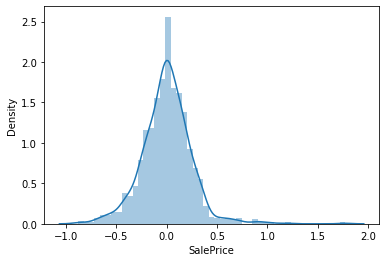

In [150]:
sns.distplot(Housing_train['SalePrice']-Lin_m.predict(Housing_train.drop('SalePrice',axis=1)))

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

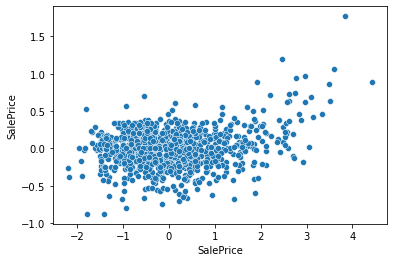

In [151]:
sns.scatterplot(Housing_train['SalePrice'],Housing_train['SalePrice']-Lin_m.predict(Housing_train.drop('SalePrice',axis=1)))

<AxesSubplot:xlabel='SalePrice'>

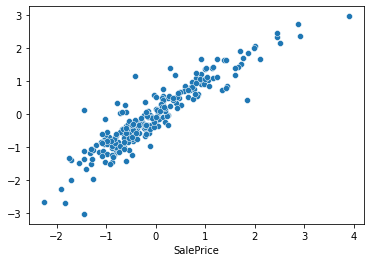

In [152]:
sns.scatterplot(Housing_test['SalePrice'],Lin_m.predict(Housing_test.drop('SalePrice',axis=1)))

In [153]:
Lin_Coef=list(Lin_m.coef_)
Lin_Coef_Abs=[abs(x) for x in Lin_Coef]
cols = list(Housing_train.columns)
Lin_Coef_df = pd.DataFrame(list(zip(cols,Lin_Coef,Lin_Coef_Abs)))
Lin_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Lin_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
242,Exterior_VinylSdPlywood,1.226681,1.226681
158,SaleCondition_Partial,-1.131884,1.131884
37,Extr12,-0.972330,0.972330
164,Condition_FeedrRRNn,-0.903589,0.903589
115,Heating_Grav,0.871234,0.871234
106,Foundation_Slab,0.830873,0.830873
203,Exterior_AsphShn,-0.706389,0.706389
39,BsmtFinType12,0.703444,0.703444
41,MSZoning_RH,0.702086,0.702086
125,Functional_Mod,-0.632621,0.632621


**Ridge**

In [154]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(Ridge(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 10}


In [155]:
param_grid = {'alpha':[1,2,3,7,10,13,14,15,16,17,18,19,20,25,30,40,50]}
grid = GridSearchCV(Ridge(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits
{'alpha': 18}


In [156]:
Ridge_lm=Ridge(alpha=10)
Ridge_lm.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Ridge_lm.predict(Housing_test.drop('SalePrice',axis=1))
print(Ridge_lm.score(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice']))
print(r2_score(SalePrice_Prd,Housing_test['SalePrice']))

0.928286994930571
0.8646783740845551


In [157]:
Ridge_Coef=Ridge_lm.coef_
Ridge_Coef=list(Ridge_lm.coef_)
Ridge_Coef_Abs=[abs(x) for x in Ridge_Coef]
cols = list(Housing_train.columns)
Ridge_Coef_df = pd.DataFrame(list(zip(cols,Ridge_Coef,Ridge_Coef_Abs)))
Ridge_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Ridge_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
72,Neighborhood_Somerst,0.228832,0.228832
66,Neighborhood_NoRidge,0.202601,0.202601
56,Neighborhood_CollgCr,0.180820,0.180820
18,GrLivArea,0.180435,0.180435
126,Functional_Sev,0.168408,0.168408
17,2ndFlrSF,0.166065,0.166065
4,OverallQual,0.154865,0.154865
14,TotalBsmtSF,0.140568,0.140568
58,Neighborhood_Edwards,-0.139637,0.139637
55,Neighborhood_ClearCr,-0.133402,0.133402


**Doubling Alpha for Ridge**

In [158]:
Ridge_lm=Ridge(alpha=20)
Ridge_lm.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Ridge_lm.predict(Housing_test.drop('SalePrice',axis=1))
print(Ridge_lm.score(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice']))
print(r2_score(SalePrice_Prd,Housing_test['SalePrice']))

0.9243848761467528
0.8618706595002052


In [159]:
Ridge_Coef=Ridge_lm.coef_
Ridge_Coef=list(Ridge_lm.coef_)
Ridge_Coef_Abs=[abs(x) for x in Ridge_Coef]
cols = list(Housing_train.columns)
Ridge_Coef_df = pd.DataFrame(list(zip(cols,Ridge_Coef,Ridge_Coef_Abs)))
Ridge_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Ridge_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
18,GrLivArea,0.180841,0.180841
4,OverallQual,0.159114,0.159114
72,Neighborhood_Somerst,0.157891,0.157891
66,Neighborhood_NoRidge,0.156495,0.156495
56,Neighborhood_CollgCr,0.152073,0.152073
17,2ndFlrSF,0.150831,0.150831
126,Functional_Sev,0.138957,0.138957
14,TotalBsmtSF,0.137100,0.137100
11,BsmtFinSF1,0.119169,0.119169
55,Neighborhood_ClearCr,-0.112333,0.112333


**Lasso**

In [160]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.001}


In [161]:
param_grid = {'alpha':[0.0005, 0.0007, 0.0009, 0.001,0.0015,0.002 , 0.003, 0.004]}
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'alpha': 0.0015}


In [162]:
Lasso_lm=Lasso(alpha=0.001)
Lasso_lm.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Lasso_lm.predict(Housing_test.drop('SalePrice',axis=1))
print(Lasso_lm.score(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice']))
print(r2_score(SalePrice_Prd,Housing_test['SalePrice']))

0.9257064878990701
0.8645660954417993


In [163]:
Lasso_Coef=list(Lasso_lm.coef_)
Lasso_Coef_Abs=[abs(x) for x in Lasso_Coef]
cols = list(Housing_train.columns)
Lasso_Coef_df = pd.DataFrame(list(zip(cols,Lasso_Coef,Lasso_Coef_Abs)))
Lasso_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Lasso_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
72,Neighborhood_Somerst,0.399625,0.399625
66,Neighborhood_NoRidge,0.327936,0.327936
56,Neighborhood_CollgCr,0.275679,0.275679
18,GrLivArea,0.223001,0.223001
71,Neighborhood_SawyerW,0.221353,0.221353
126,Functional_Sev,0.212147,0.212147
65,Neighborhood_NWAmes,0.206404,0.206404
157,SaleCondition_Normal,0.166133,0.166133
108,BsmtExposure_Av,0.162713,0.162713
53,Neighborhood_BrDale,0.156546,0.156546


**Doubling Alpha for Lasso**

In [164]:
Lasso_lm=Lasso(alpha=0.002)
Lasso_lm.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Lasso_lm.predict(Housing_test.drop('SalePrice',axis=1))
print(Lasso_lm.score(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice']))
print(r2_score(SalePrice_Prd,Housing_test['SalePrice']))

0.920262864084647
0.8599506463131642


In [165]:
Lasso_Coef=list(Lasso_lm.coef_)
Lasso_Coef_Abs=[abs(x) for x in Lasso_Coef]
cols = list(Housing_train.columns)
Lasso_Coef_df = pd.DataFrame(list(zip(cols,Lasso_Coef,Lasso_Coef_Abs)))
Lasso_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Lasso_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
72,Neighborhood_Somerst,0.313302,0.313302
18,GrLivArea,0.303964,0.303964
66,Neighborhood_NoRidge,0.287809,0.287809
56,Neighborhood_CollgCr,0.263655,0.263655
71,Neighborhood_SawyerW,0.173548,0.173548
126,Functional_Sev,0.172041,0.172041
4,OverallQual,0.159133,0.159133
65,Neighborhood_NWAmes,0.155091,0.155091
157,SaleCondition_Normal,0.148361,0.148361
53,Neighborhood_BrDale,0.147729,0.147729


**Dropping top 5 important columns**

In [166]:
Drop_Top_5=['Neighborhood_Somerst','Neighborhood_NoRidge','Neighborhood_NWAmes','BsmtFinType12','Neighborhood_CollgCr','SalePrice']

In [167]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop(Drop_Top_5,axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.001}


In [168]:
param_grid = {'alpha':[0.0005, 0.0007, 0.0009, 0.001,0.0015,0.002 , 0.003, 0.004]}
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='neg_mean_absolute_error')
grid.fit(Housing_train.drop(Drop_Top_5,axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'alpha': 0.0015}


In [169]:
Lasso_lm=Lasso(alpha=0.001)
Lasso_lm.fit(Housing_train.drop(Drop_Top_5,axis=1),Housing_train['SalePrice'])
SalePrice_Prd=Lasso_lm.predict(Housing_test.drop(Drop_Top_5,axis=1))
print(Lasso_lm.score(Housing_train.drop(Drop_Top_5,axis=1),Housing_train['SalePrice']))
print(r2_score(SalePrice_Prd,Housing_test['SalePrice']))

0.9228327055543517
0.859986132437167


In [170]:
Lasso_Coef=list(Lasso_lm.coef_)
Lasso_Coef_Abs=[abs(x) for x in Lasso_Coef]
cols = list(Housing_train.drop(Drop_Top_5,axis=1).columns)
Lasso_Coef_df = pd.DataFrame(list(zip(cols,Lasso_Coef,Lasso_Coef_Abs)))
Lasso_Coef_df.columns = ['Feature','Coef','Coef_Abs']
Lasso_Coef_df.sort_values(by='Coef_Abs',ascending=False).head(10)

,Feature,Coef,Coef_Abs
67,Neighborhood_StoneBr,0.394398,0.394398
62,Neighborhood_NridgHt,0.297447,0.297447
54,Neighborhood_Crawfor,0.277184,0.277184
18,GrLivArea,0.227213,0.227213
121,Functional_Typ,0.217143,0.217143
38,MSZoning_FV,0.176679,0.176679
52,Neighborhood_BrkSide,0.165228,0.165228
188,BsmtFinType_NB,0.164251,0.164251
152,SaleCondition_Partial,0.163705,0.163705
103,BsmtExposure_Gd,0.162277,0.162277


In [171]:
len(Housing_train.columns)

260

In [172]:
param_grid = {'n_features_to_select':[20, 50, 100, 150, 200, 247]}
grid = GridSearchCV(RFE(estimator=LinearRegression()), param_grid, refit = True, verbose = 3,n_jobs=-1)
grid.fit(Housing_train.drop('SalePrice',axis=1),Housing_train['SalePrice'])
print(grid.best_params_) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_features_to_select': 247}
